<h1>Submitted by : Ishan Ojha , CS-21, ASSIGNMENT NO : 6
 </h1>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import warnings
import logging

# Disable TensorFlow v2 behavior to use v1-style code
tf.disable_v2_behavior()



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

In [ ]:
# defining helper functions
def initialize_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def initialize_bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

def convolution(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [4]:
# placeholder input and output

#input image
X_ = tf.placeholder(tf.float32, [None, 784])

# reshaped input image
X = tf.reshape(X_, [-1, 28, 28, 1])

# output label
y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# Defining convolution network
W1 = initialize_weights([5,5,1,32])
b1 = initialize_bias([32])
conv1 = tf.nn.relu(convolution(X, W1) + b1)
pool1 = max_pooling(conv1)


In [6]:

# second convolution layer
W2 = initialize_weights([5,5,32,64])
b2 = initialize_bias([64])
conv2 = tf.nn.relu(convolution(pool1, W2) + b2)
pool2 = max_pooling(conv2)


In [7]:

# flatten output
flattened = tf.reshape(pool2, [-1, 7*7*64])
# fully connected layer
W_fc = initialize_weights([7*7*64, 1024])
b_fc = initialize_bias([1024])
fc_output = tf.nn.relu(tf.matmul(flattened, W_fc) + b_fc)

# output layer
W_out = initialize_weights([1024, 10])
b_out = initialize_bias([10])
y_hat = tf.nn.softmax(tf.matmul(fc_output, W_out) + b_out)

In [8]:
# cost function
cross_entropy = -tf.reduce_sum(y*tf.log(y_hat))
# optimizer
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# accuracy
predicted_digit = tf.argmax(y_hat, 1)
actual_digit = tf.argmax(y, 1)

correct_pred = tf.equal(predicted_digit,actual_digit)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [9]:
# custom function to batch the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

def next_batch(batch_size):
    idx = np.random.choice(len(x_train), batch_size, replace=False)
    return x_train[idx].reshape(-1, 784), y_train[idx]

In [10]:
# start training

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    batch_x, batch_y = next_batch(100)
    sess.run(optimizer, feed_dict={X_: batch_x, y: batch_y})
    if epoch % 100 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={X_: batch_x, y: batch_y})
        print("Epoch:", epoch, "Training accuracy:", train_accuracy)

Epoch: 0 Training accuracy: 0.23
Epoch: 100 Training accuracy: 0.89
Epoch: 200 Training accuracy: 0.9
Epoch: 300 Training accuracy: 0.96
Epoch: 400 Training accuracy: 0.98
Epoch: 500 Training accuracy: 0.95
Epoch: 600 Training accuracy: 0.96
Epoch: 700 Training accuracy: 0.94
Epoch: 800 Training accuracy: 0.96
Epoch: 900 Training accuracy: 0.99


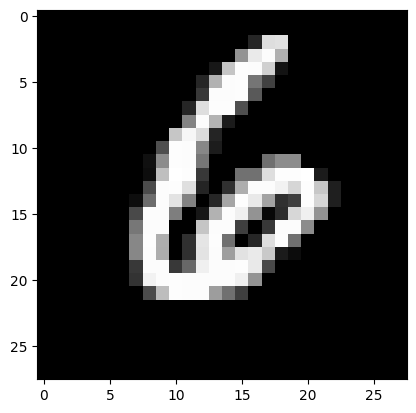

In [11]:
# visualize extracted features
plt.imshow(x_train[13], cmap='gray')

In [12]:
image = x_train[7].reshape(1, 784)  # batch size 1


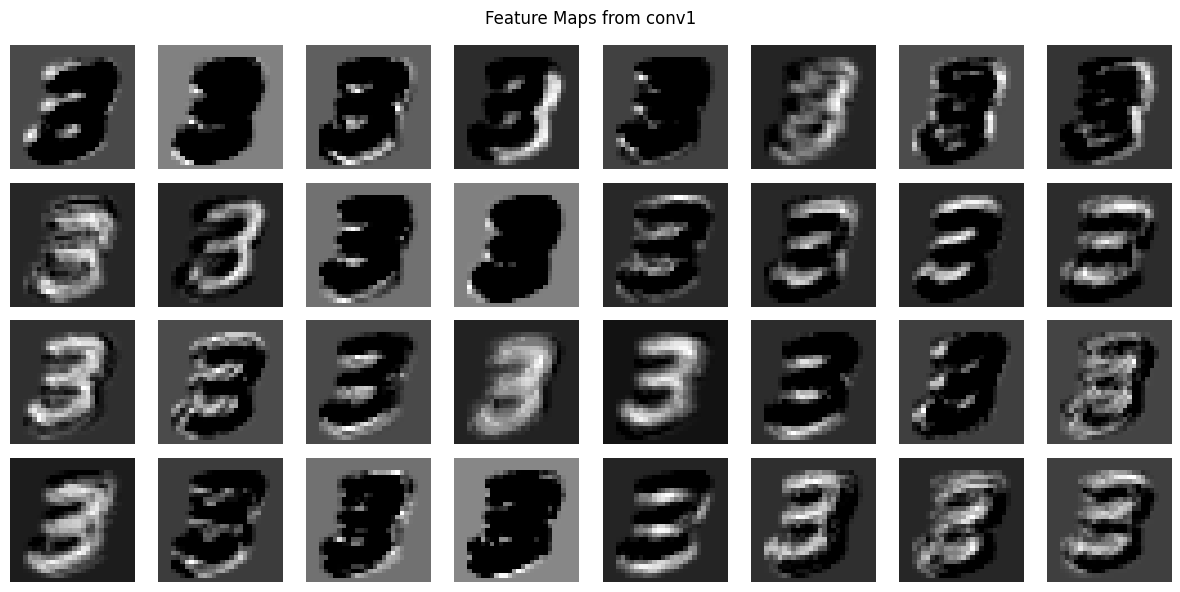

In [13]:

# Run convolution layers to get feature maps
feature_map1 = sess.run(conv1, feed_dict={X_: image})  # shape: [1, 28, 28, 32]
feature_map2 = sess.run(conv2, feed_dict={X_: image})  # shape: [1, 14, 14, 64]

# Plot feature maps from conv1
plt.figure(figsize=(12, 6))
plt.suptitle("Feature Maps from conv1")
for i in range(32):
    feature = feature_map1[0, :, :, i]  # shape (28, 28)
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


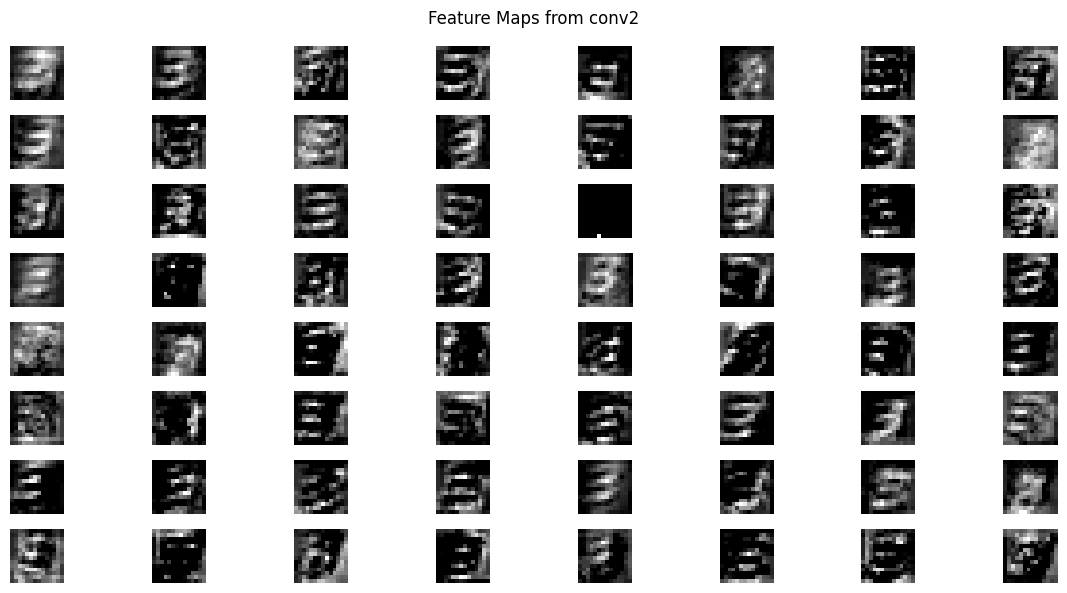

In [14]:

# Plot feature maps from conv2
plt.figure(figsize=(12, 6))
plt.suptitle("Feature Maps from conv2")
for i in range(64):
    feature = feature_map2[0, :, :, i]  # shape (14, 14)
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()